In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

Загрузка датасета

In [15]:
spam = pd.read_csv('../data/raw/train_spam.csv', index_col=False)
spam

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


Разделение на тест и трейн

In [16]:
X = spam['text']
y = spam["text_type"]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)

Токенизация

In [17]:
cv = CountVectorizer()
features = cv.fit_transform(X_train)

In [18]:
model = RandomForestClassifier()
model.fit(features, y_train)

RandomForestClassifier()

Тестирование модели

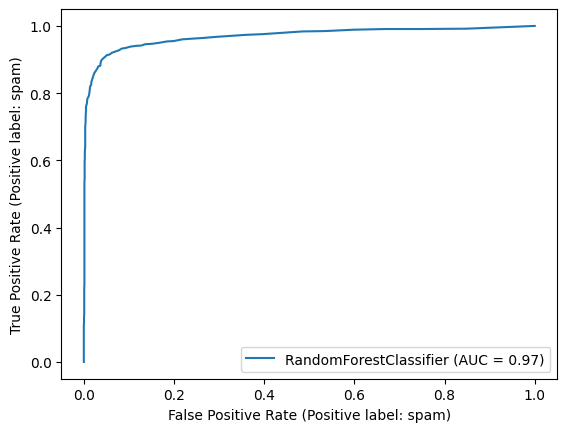

In [19]:
test_features = cv.transform(X_test)

svc_disp = RocCurveDisplay.from_estimator(model, test_features, y_test)
plt.show()

In [20]:

y_scores = model.predict_proba(test_features)

roc_auc = roc_auc_score(y_test, y_scores[:, 1])

print("ROC AUC Score: {}".format(roc_auc))
print("Accuracy: {}".format(model.score(test_features,y_test)))

ROC AUC Score: 0.9694418230514812
Accuracy: 0.9183046683046683


In [21]:
test_df = pd.read_csv('../data/raw/test_spam.csv', index_col=False)
test_df

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


In [22]:
test_emails = test_df['text']

test_features = cv.transform(test_emails)

scores = model.predict_proba(test_features)

output = pd.DataFrame({'text': test_emails, 'scores': scores[:, 1]})
output.to_csv('../data/interim/RF_predictions.csv', index=False)

print("Predictions saved to 'RF_predictions.csv'")

Predictions saved to 'RF_predictions.csv'


In [23]:
output

,text,scores
0,j jim whitehead ejw cse ucsc edu writes j you ...,0.09
1,original message from bitbitch magnesium net p...,0.22
2,java for managers vince durasoft who just taug...,0.09
3,there is a youtuber name saiman says,0.01
4,underpriced issue with high return on equity t...,0.86
...,...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...,0.04
4066,baylor enron case study cindy yes i shall co a...,0.02
4067,boring as compared to tp,0.00
4068,hellogorgeous hows u my fone was on charge lst...,0.04
